In [ ]:
#A. View the Data

In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-crockett-bucketone561/Border_Crossing_Entry_Data.csv') # load the data from s3
df.tail() #show the top 5 rows

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
403078,Ogdensburg,New York,701,US-Canada Border,Jul 2025,Truck Containers Empty,434,44.733,-75.458,POINT (-75.4577501759 44.7330898624)
403079,Limestone,Maine,118,US-Canada Border,Jul 2025,Truck Containers Loaded,25,46.925,-67.790,POINT (-67.789597 46.924555)
403080,Turner,Montana,3306,US-Canada Border,Jul 2025,Personal Vehicle Passengers,1135,49.000,-108.388,POINT (-108.387916 48.999527)
403081,El Paso,Texas,2402,US-Mexico Border,Jul 2025,Rail Containers Empty,8876,31.764,-106.451,POINT (-106.451188 31.764363)
403082,Calexico,California,2503,US-Mexico Border,Jul 2025,Pedestrians,215503,32.673,-115.388,POINT (-115.388018 32.673389)


In [3]:
df.shape #show the number of rows and columns 

(403083, 10)

In [4]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403083 entries, 0 to 403082
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  403083 non-null  object 
 1   State      403079 non-null  object 
 2   Port Code  403083 non-null  int64  
 3   Border     403083 non-null  object 
 4   Date       403083 non-null  object 
 5   Measure    403083 non-null  object 
 6   Value      403083 non-null  int64  
 7   Latitude   403079 non-null  float64
 8   Longitude  403079 non-null  float64
 9   Point      403079 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.8+ MB


In [6]:
df.describe()

,Port Code,Value,Latitude,Longitude
count,403083.000000,4.030830e+05,403079.000000,403079.000000
mean,2445.398769,2.903942e+04,43.961375,-99.709766
std,1204.475508,1.494380e+05,8.154120,18.260592
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.520000e+02,48.122000,-101.628000
75%,3401.000000,3.079000e+03,49.000000,-84.361000
max,3814.000000,4.447374e+06,62.615000,-66.980000


In [ ]:
# This data set has 10 columns and 403,830 rows with a combination of numerical and textual entries. My first impression is that this data is very location focused and specific for each entry.

In [ ]:
#B. Clean the Data

In [7]:
#rename columns
df = df.rename(columns={"Measure": "Method"}) 
df.head()

,Port Name,State,Port Code,Border,Date,Method,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [ ]:
#Check for missing valuess


In [8]:
df.isnull().sum()

Port Name    0
State        4
Port Code    0
Border       0
Date         0
Method       0
Value        0
Latitude     4
Longitude    4
Point        4
dtype: int64

In [ ]:
#I renamed the 'Measure' column as 'Method', meaning the method of transportation used. There were only 4 missing values under 'State', 4 missing values under 'Latitude', 4 missing values under 'Longitue', and 4 missing values under 'Point'.

In [ ]:
#C. Manipulating the Data

In [9]:
#Select and display one column
df['Port Code']

0          104
1         3308
2         2608
3         3325
4         3423
          ... 
403078     701
403079     118
403080    3306
403081    2402
403082    2503
Name: Port Code, Length: 403083, dtype: int64

In [11]:
#Sort Rows by One Column
df.sort_values(by="Value")

,Port Name,State,Port Code,Border,Date,Method,Value,Latitude,Longitude,Point
94087,Walhalla,North Dakota,3407,US-Canada Border,Dec 2014,Pedestrians,0,49.000,-97.908,POINT (-97.908416 49.000472)
94058,Bridgewater,Maine,127,US-Canada Border,Aug 2013,Rail Containers Loaded,0,46.450,-67.785,POINT (-67.78484 46.450335)
94059,Metaline Falls,Washington,3025,US-Canada Border,Sep 2014,Rail Containers Loaded,0,49.000,-117.299,POINT (-117.299444 48.999972)
94061,Alcan,Alaska,3104,US-Canada Border,Sep 2013,Rail Containers Empty,0,62.615,-141.001,POINT (-141.001444 62.614961)
94065,Piegan,Montana,3316,US-Canada Border,Aug 2013,Rail Containers Loaded,0,48.998,-113.379,POINT (-113.378777 48.998083)
...,...,...,...,...,...,...,...,...,...,...
327342,El Paso,Texas,2402,US-Mexico Border,Jun 2000,Personal Vehicle Passengers,4235244,31.764,-106.451,POINT (-106.451188 31.764363)
313943,El Paso,Texas,2402,US-Mexico Border,Apr 2001,Personal Vehicle Passengers,4252128,31.764,-106.451,POINT (-106.451188 31.764363)
319032,El Paso,Texas,2402,US-Mexico Border,Feb 2001,Personal Vehicle Passengers,4281175,31.764,-106.451,POINT (-106.451188 31.764363)
309297,El Paso,Texas,2402,US-Mexico Border,Aug 2000,Personal Vehicle Passengers,4291774,31.764,-106.451,POINT (-106.451188 31.764363)


In [12]:
df[5:10]

,Port Name,State,Port Code,Border,Date,Method,Value,Latitude,Longitude,Point
5,Whitlash,Montana,3321,US-Canada Border,Jan 2024,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
6,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)
7,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Trucks,837,48.999,-95.377,POINT (-95.376555 48.999)
8,Wildhorse,Montana,3323,US-Canada Border,Jan 2024,Trucks,20,48.999,-110.215,POINT (-110.215083 48.999361)
9,Wildhorse,Montana,3323,US-Canada Border,Jan 2024,Personal Vehicle Passengers,965,48.999,-110.215,POINT (-110.215083 48.999361)


In [13]:
df[df["Value"] > 500]

,Port Name,State,Port Code,Border,Date,Method,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)
6,Ysleta,Texas,2401,US-Mexico Border,Jan 2024,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)
7,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Trucks,837,48.999,-95.377,POINT (-95.376555 48.999)
9,Wildhorse,Montana,3323,US-Canada Border,Jan 2024,Personal Vehicle Passengers,965,48.999,-110.215,POINT (-110.215083 48.999361)
...,...,...,...,...,...,...,...,...,...,...
403075,Eastport,Maine,103,US-Canada Border,Jul 2025,Personal Vehicle Passengers,25436,44.859,-66.980,POINT (-66.98007566 44.8594395785)
403076,Roosville,Montana,3318,US-Canada Border,Jul 2025,Personal Vehicles,16869,49.000,-115.056,POINT (-115.056027 48.999638)
403080,Turner,Montana,3306,US-Canada Border,Jul 2025,Personal Vehicle Passengers,1135,49.000,-108.388,POINT (-108.387916 48.999527)
403081,El Paso,Texas,2402,US-Mexico Border,Jul 2025,Rail Containers Empty,8876,31.764,-106.451,POINT (-106.451188 31.764363)


In [ ]:
# I selected to display port codes. Next, I sorted the rows by the value of each entry. Finally, I filtered the data to only show me entries with a value greater then 500.  

In [19]:
sum_cases_by_date = df.groupby('State')['Value'].sum()
sum_cases_by_date.head()

State
Alaska          16919206
Arizona       1080724309
California    3105353163
Idaho           24846773
Maine          254496490
Name: Value, dtype: int64

In [ ]:
value_by_country = 

<Axes: xlabel='State'>

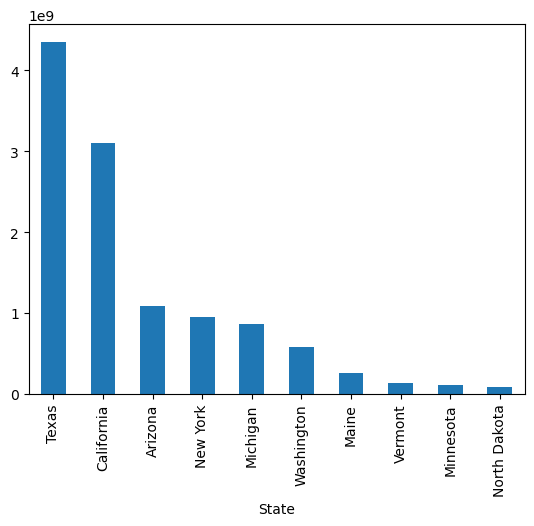

In [44]:
Value_by_country = df.groupby('State')['Value'].sum() 
Value_by_country.nlargest(10).plot.bar()

In [ ]:
#The above bar chart displays the number of border crossings per state. Texas and California have a noticeably larger number of border crossings than the northern bordering states. This implies the southern border has more traffic than the northern border.

In [28]:
sum_Value_by_Date = df.groupby('Date')['Value'].sum() #aggregate the total case number per day
sum_cases_by_date.head()

Date
Apr 1996    35690321
Apr 1997    38632051
Apr 1998    42047792
Apr 1999    43042565
Apr 2000    44639294
Name: Value, dtype: int64

In [34]:
df["Date"] = pd.to_datetime(df["Date"])


In [35]:
df = df.sort_values("Date")


<Axes: title={'center': 'Trend Over Time'}, xlabel='Date'>

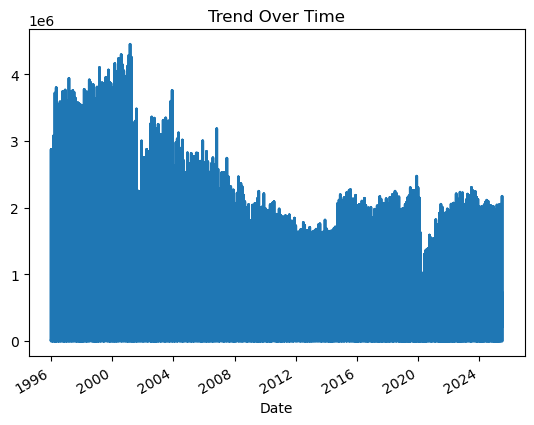

In [37]:
df.plot(x="Date", y="Value", kind="line", legend=False, linewidth=2, title="Trend Over Time")


In [ ]:
# The above graph shows the trend of border crossings discovered over the past ~30 years. As seen above, it has been on a gradual downward trend with a few small peaks over the years. Noticeable dips can be found in the early 2000s and in 2020.